In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
import time
import numpy as np
import warnings
warnings.filterwarnings("ignore")

<h1>Loading the preprocessed data</h1>

In [3]:
total_data = pd.read_csv("total_data_version_1.csv")

In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13650356 entries, 0 to 13650355
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   city_name         object 
 1   date              object 
 2   avg_temp_c        float64
 3   min_temp_c        float64
 4   max_temp_c        float64
 5   precipitation_mm  float64
 6   country           int64  
 7   state             int64  
 8   latitude          float64
 9   longitude         float64
 10  capital           int64  
 11  region            int64  
 12  continent         int64  
 13  season_Spring     bool   
 14  season_Summer     bool   
 15  season_Winter     bool   
dtypes: bool(3), float64(6), int64(5), object(2)
memory usage: 1.4+ GB


<Axes: >

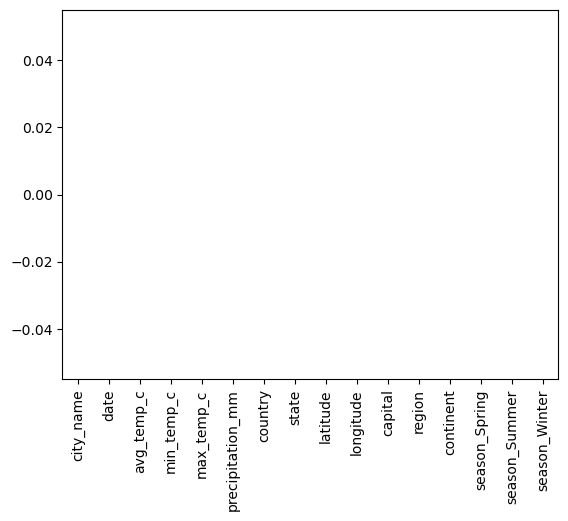

In [4]:
total_data.isna().sum().plot(kind='bar')

<h3>Dropping the columns for training</h3>

In [5]:
X = total_data.drop(columns=["city_name","date","avg_temp_c"])
y = total_data["avg_temp_c"]

In [7]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [8]:
X_train.shape, X_test.shape

((10920284, 13), (2730072, 13))

<h2>1. Linear Regression</h2>

In [9]:
def linear_model(X,y):
    model = LinearRegression()
    model.fit(X,y)
    return model

In [10]:
start_time = time.time()
model = linear_model(X_train, y_train)
end_time = time.time()
print(f"Total time for took for training: {end_time - start_time:.2f} seconds")
model.score(X_test,y_test)

Total time for took for training: 2.91 seconds


0.9184691579701137

<h2>2. Logistic Regression</h2>

In [11]:
def logist_model(X,y, penalty='l2',solver='liblinear'):
    model = LogisticRegression(penalty=penalty,solver=solver)
    model.fit(X,y)
    return model

In [13]:
bins = [-np.inf,27,np.inf]
labels = ['cold','hot']
y = pd.cut(total_data['avg_temp_c'], bins=bins, labels=labels)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [14]:
for solver in  ['liblinear' , 'lbfgs', 'newton-cg', 'sag', 'saga']:
    start_time = time.time()
    model = logist_model(X_train, y_train , solver=solver)
    end_time = time.time()
    print(f"Total time for took for training: {end_time - start_time:.2f} seconds for solver {solver} and Score is {model.score(X_test, y_test)}")

Total time for took for training: 132.33 seconds for solver liblinear and Score is 0.9218921698768384
Total time for took for training: 51.51 seconds for solver lbfgs and Score is 0.8765732185817809
Total time for took for training: 224.94 seconds for solver newton-cg and Score is 0.9222485707336656
Total time for took for training: 587.39 seconds for solver sag and Score is 0.9218430869222497
Total time for took for training: 585.83 seconds for solver saga and Score is 0.9194750175086958


<h2>3. Nearest Neighbors</h2>

In [16]:
def NN(X,y,n):
    neigh = KNeighborsRegressor(n_neighbors=n)
    neigh.fit(X,y)
    return neigh

In [18]:
for i in range(1,20):
    start_time = time.time()
    model = NN(X_train, y_train , i)
    end_time = time.time()
    print(f"Total time for took for training: {end_time - start_time:.2f} and Score is {model.score(X_test,y_test)}")

Total time for took for training: 51.39 and Score is 0.9736142570503293
Total time for took for training: 53.19 and Score is 0.9798265108916351
Total time for took for training: 52.66 and Score is 0.9819013701123614
Total time for took for training: 59.04 and Score is 0.9829549281418148
Total time for took for training: 63.89 and Score is 0.9834715448287873
Total time for took for training: 66.34 and Score is 0.9838506351751961
Total time for took for training: 62.42 and Score is 0.9840587582554532
Total time for took for training: 61.83 and Score is 0.9841663201758533
Total time for took for training: 58.05 and Score is 0.9842516195095954
Total time for took for training: 61.58 and Score is 0.9842856116361345
Total time for took for training: 75.17 and Score is 0.9843350368512868
Total time for took for training: 71.54 and Score is 0.9843500286301413
Total time for took for training: 71.80 and Score is 0.9843811481727037
Total time for took for training: 79.16 and Score is 0.984386488

<h2>4. Random Forest</h2>

In [11]:
def random_forest_classifier_model(X, y, n_estimators=3, random_state=42):
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    model.fit(X, y)
    return model

In [11]:
start_time = time.time()
rf_classifier_model = random_forest_classifier_model(X_train, y_train)
end_time = time.time()
print(f"Total time for training: {end_time - start_time:.2f} seconds")

y_pred = rf_classifier_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Model Accuracy: {accuracy}")

Total time for training: 1930.59 seconds
Random Forest Classifier Model Accuracy: 0.9616189609651321


In [16]:
for i in range(1,10):
    start_time = time.time()
    rf_classifier_model = random_forest_classifier_model(X_train, y_train,n_estimators=i)
    end_time = time.time()
    print(f"n_estimators = {i} Total time for training: {end_time - start_time:.2f} seconds")

    y_pred = rf_classifier_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Random Forest Classifier Model Accuracy: {accuracy}")

n_estimators = 1 Total time for training: 22.06 seconds
Random Forest Classifier Model Accuracy: 0.9544502855602343
n_estimators = 2 Total time for training: 34.72 seconds
Random Forest Classifier Model Accuracy: 0.9551118065750647
n_estimators = 3 Total time for training: 48.94 seconds
Random Forest Classifier Model Accuracy: 0.958270331331921
n_estimators = 4 Total time for training: 61.60 seconds
Random Forest Classifier Model Accuracy: 0.9585058562558058
n_estimators = 5 Total time for training: 70.59 seconds
Random Forest Classifier Model Accuracy: 0.9594820209869923
n_estimators = 6 Total time for training: 84.92 seconds
Random Forest Classifier Model Accuracy: 0.9595545465467578
n_estimators = 7 Total time for training: 110.07 seconds
Random Forest Classifier Model Accuracy: 0.9600091133127624
n_estimators = 8 Total time for training: 111.74 seconds
Random Forest Classifier Model Accuracy: 0.9600984882449987


KeyboardInterrupt: 

<h2>5. Elastic Net</h2>

In [18]:
def elasticNet_model(X,y,selection = 'random') :
    model = ElasticNet(selection=selection)
    model.fit(X,y)
    return model

In [23]:
for selection in ['random', 'cyclic']:
    start_time = time.time()
    model = elasticNet_model(X_train, y_train , selection=selection)
    end_time = time.time()
    print(f"Total time for took for training: {end_time - start_time :.2f} seconds for selection '{selection}' and score is {model.score(X_test,y_test)}")

Total time for took for training: 11.63 seconds for selection 'random' and score is 0.9144584699130379
Total time for took for training: 7.27 seconds for selection 'cyclic' and score is 0.9144595307631991


<h2>Future Work</h2>

In [13]:
def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std


train_split = int(0.75 * int(total_data.shape[0]))
new_data = normalize(total_data[2:], train_split)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_data[1:],new_data[0],test_size=0.20,random_state=42)

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(3,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])